In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
#draw the background of the plots with different colors according to the class, and by comparing the color of the point, which is the ground truth, with the color of the background, and observe visually how the classifier is working

In [3]:
df = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\dataframe_classification.csv',  header=0, parse_dates=True, squeeze=True)

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Hours,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,Time_blocks_2,Time_blocks_3,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,14,1,1,0,0,1,0,1
1,23.7180,26.290,578.400000,760.400000,0.004773,14,1,1,0,0,1,0,1
2,23.7300,26.230,572.666667,769.666667,0.004765,14,1,1,0,0,1,0,1
3,23.7225,26.125,493.750000,774.750000,0.004744,14,1,1,0,0,1,0,1
4,23.7540,26.200,488.600000,779.000000,0.004767,14,1,1,0,0,1,0,1


In [5]:
class_name = 'Occupancy'
columns2remove = ['Hours', 'Humidity']
df.drop(columns2remove, inplace=True, axis=1)

In [6]:
df.columns

Index(['Temperature', 'Light', 'CO2', 'HumidityRatio', 'Office_Hours',
       'Working_day', 'Time_blocks_0', 'Time_blocks_1', 'Time_blocks_2',
       'Time_blocks_3', 'Occupancy'],
      dtype='object')

In [7]:
from data_preparation import prepare_dataset

In [8]:
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

,Temperature,Light,CO2,HumidityRatio,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,Time_blocks_2,Time_blocks_3,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1,1,0,0,1,0,1
1,23.7180,578.400000,760.400000,0.004773,1,1,0,0,1,0,1
2,23.7300,572.666667,769.666667,0.004765,1,1,0,0,1,0,1
3,23.7225,493.750000,774.750000,0.004744,1,1,0,0,1,0,1
4,23.7540,488.600000,779.000000,0.004767,1,1,0,0,1,0,1


In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
columns = ['Temperature', 'Light', 'CO2', 'HumidityRatio']
sc_X.fit(np.array(df[columns]))
df[columns] = sc_X.transform(np.array(df[columns]))

In [10]:
df.head()

,Temperature,Light,CO2,HumidityRatio,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,Time_blocks_2,Time_blocks_3,Occupancy
0,2.647415,2.159638,0.188457,0.697856,1,1,0,0,1,0,1
1,2.664472,2.127322,0.224448,0.708923,1,1,0,0,1,0,1
2,2.675843,2.100076,0.254226,0.699145,1,1,0,0,1,0,1
3,2.668736,1.725043,0.270560,0.671302,1,1,0,0,1,0,1
4,2.698586,1.700568,0.284218,0.701022,1,1,0,0,1,0,1


In [11]:
import sys
sys.path.append('./')

# Data Partitioning

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [13]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
#questa cosa è incorretta perchè non ho fatto la normalizzazione prima di applicare la PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

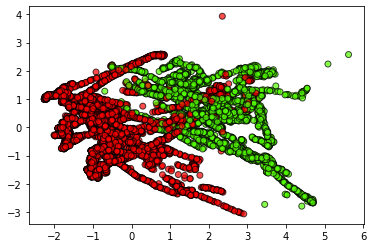

In [16]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show() # i punti verdi e rossi sono la ground truth values, once i learn a classifier i should be albe to see the space divided into several different area

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [18]:
from itertools import product

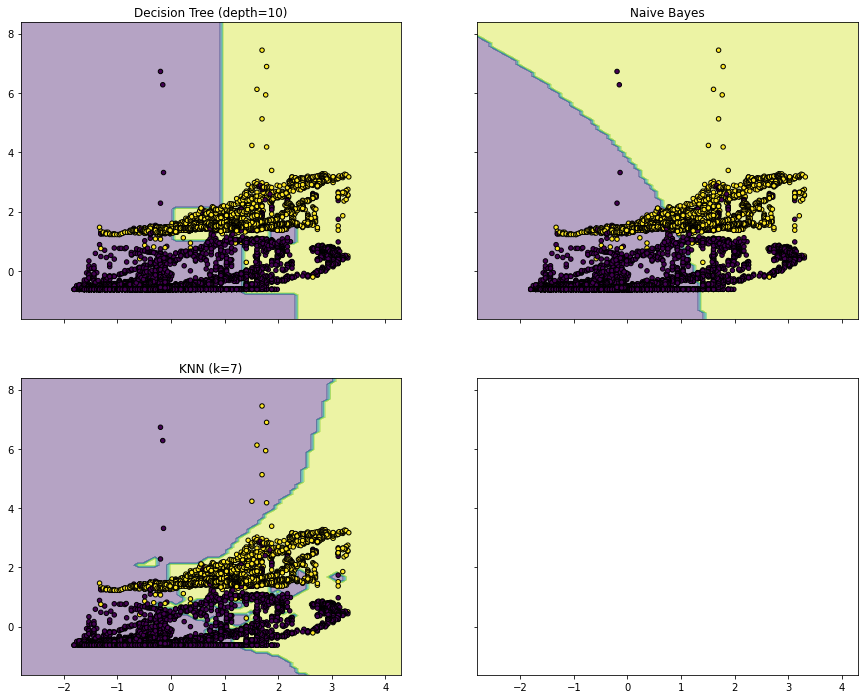

In [19]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth= 10, 
                             min_samples_split=150, min_samples_leaf=150, random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=18, metric='manhattan', )
clf2 = GaussianNB()

clf1.fit(X_pca, y_train)
clf2.fit(X_pca, y_train)
clf3.fit(X_pca, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(15, 12))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3],
                        ['Decision Tree (depth=10)',
                         'Naive Bayes', 'KNN (k=7)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# Linear SVM

In [19]:
from sklearn.svm import LinearSVC #prima facciamo il linear svm
#ovviamente nella realtà è quasi impossibile trovare problemi perfettamente separabili
#per questo dobbiamo sempre specificare il parametro C, che è considera l'ammontare della penalizzazione per la misclassificazione dei record

penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000

In [21]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred)) #very bad accuracy
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

Accuracy 0.9904345006485085
F1-score [0.99374669 0.97966219]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.96      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

Accuracy: 0.9901 (+/- 0.02)
F1-score: 0.9865 (+/- 0.03)
0.9927984730960862


In [24]:
clf = LinearSVC(C=100, random_state=42, max_iter=100000) #try to change C
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

Accuracy 0.9905966277561609
F1-score [0.99385333 0.98      ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.96      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

Accuracy: 0.9902 (+/- 0.02)
F1-score: 0.9866 (+/- 0.03)
0.9929038916075769


In [25]:
#nella lineare non possiamo estrarre facilmente il support vector
decision_function = clf.decision_function(X_train) # chiamo la decision function, che ritorna la confidence dei sample in input
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0] # otteniamo il support vector index vedendo dove il valore è minore di 1, tengo solo la prima componente perchè è l'unica che mi interessa
support_vectors = X_train[support_vector_indices] # index nel training per avere il support vector

In [26]:
support_vectors_pca = pca.transform(support_vectors) #pca del support vector per avere due dimensioni

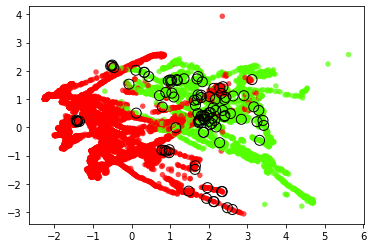

In [27]:
# i cerchi sono i support vector
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

degree is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data.

# Nonlinear SVM

In [21]:
from sklearn.svm import SVC

Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

Regularization: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [20]:
clf = SVC(kernel='rbf', C=100, random_state=42) #prova diversi kernel function per creare il problema lineare
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

Accuracy 0.9909208819714657
F1-score [0.99406402 0.98070296]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.96      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

Accuracy: 0.9339 (+/- 0.11)
F1-score: 0.9089 (+/- 0.15)
0.9936056459935418


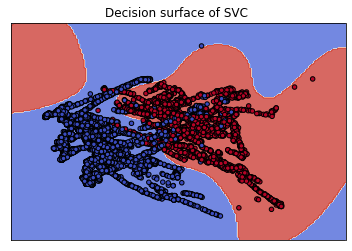

In [34]:
def make_meshgrid(x, y, h=.05):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

clf= SVC(kernel='rbf', C=100, random_state=42) #prova diversi kernel function per creare il problema lineare
clf.fit(X_pca, y_train)


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of SVC ')
# Set-up grid for plotting.
X0, X1 = X_pca[:, 0], X_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()


In [40]:
clf = SVC( C=0.01, kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

Accuracy 0.9899481193255513
F1-score [0.99342942 0.97862069]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.96      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

Accuracy: 0.9893 (+/- 0.02)
F1-score: 0.9854 (+/- 0.03)
0.9919913001986307


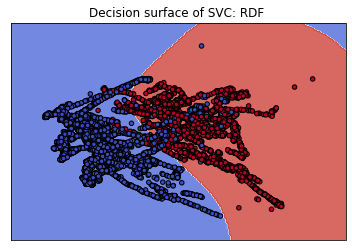

In [41]:
def make_meshgrid(x, y, h=.05):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

clf= SVC(kernel='rbf', C=0.01, random_state=42) #prova diversi kernel function per creare il problema lineare
clf.fit(X_pca, y_train)


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of SVC: RDF ')
# Set-up grid for plotting.
X0, X1 = X_pca[:, 0], X_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()


In [29]:
clf = SVC( C=100, kernel='sigmoid', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

Accuracy 0.8842412451361867
F1-score [0.92496847 0.74680851]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      4743
           1       0.75      0.74      0.75      1425

    accuracy                           0.88      6168
   macro avg       0.84      0.83      0.84      6168
weighted avg       0.88      0.88      0.88      6168

Accuracy: 0.8612 (+/- 0.31)
F1-score: 0.8227 (+/- 0.33)
0.833420553280735


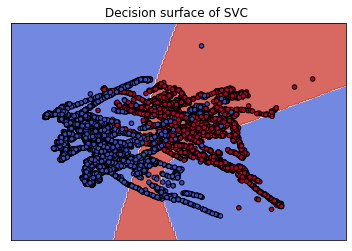

In [35]:
clf= SVC(kernel='sigmoid', C=100, random_state=42) #prova diversi kernel function per creare il problema lineare
clf.fit(X_pca, y_train)


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of SVC ')
# Set-up grid for plotting.
X0, X1 = X_pca[:, 0], X_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()


In [33]:
clf = SVC( C=0.001, kernel='sigmoid', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

Accuracy 0.958981841763943
F1-score [0.97260422 0.91841342]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4743
           1       0.85      1.00      0.92      1425

    accuracy                           0.96      6168
   macro avg       0.92      0.97      0.95      6168
weighted avg       0.97      0.96      0.96      6168

Accuracy: 0.9459 (+/- 0.08)
F1-score: 0.9318 (+/- 0.10)
0.973083657911382


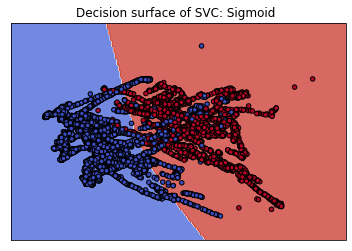

In [42]:
clf= SVC(kernel='sigmoid', C=0.001, random_state=42) #prova diversi kernel function per creare il problema lineare
clf.fit(X_pca, y_train)


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of SVC: Sigmoid ')
# Set-up grid for plotting.
X0, X1 = X_pca[:, 0], X_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()


In [43]:
clf = SVC( C=0.1, kernel='poly', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

Accuracy 0.9902723735408561
F1-score [0.99364137 0.97931034]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.96      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

Accuracy: 0.9901 (+/- 0.02)
F1-score: 0.9865 (+/- 0.03)
0.9924475959031037


In [ ]:
clf = SVC( C=0.1, kernel='poly', random_state=42, gamma = 10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

Accuracy 0.9904345006485085
F1-score [0.99374536 0.9796762 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.96      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [ ]:
clf= SVC(kernel='poly', C=0.1, random_state=42, gamma=10) #prova diversi kernel function per creare il problema lineare
clf.fit(X_pca, y_train)


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of SVC ')
# Set-up grid for plotting.
X0, X1 = X_pca[:, 0], X_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()


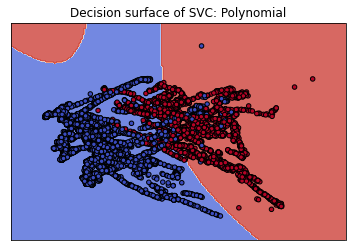

In [53]:
clf= SVC(kernel='poly', C=0.1, random_state=42) #prova diversi kernel function per creare il problema lineare
clf.fit(X_pca, y_train)


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of SVC: Polynomial')
# Set-up grid for plotting.
X0, X1 = X_pca[:, 0], X_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()


In [17]:
clf.support_ # possiamo vedere di default il support vector

array([   38,    67,   144,   191,   241,   269,   287,   355,   357,
         377,   475,   495,   504,   512,   521,   522,   688,   717,
         743,   746,   948,   954,   958,   962,   965,   986,   995,
         997,  1000,  1103,  1114,  1137,  1147,  1172,  1174,  1183,
        1229,  1236,  1376,  1396,  1406,  1455,  1489,  1546,  1552,
        1585,  1616,  1629,  1630,  1673,  1741,  1765,  1794,  1829,
        1850,  1869,  1894,  1913,  2012,  2020,  2043,  2057,  2112,
        2193,  2291,  2298,  2370,  2382,  2400,  2406,  2420,  2486,
        2510,  2511,  2589,  2656,  2740,  2745,  2749,  2758,  2784,
        2785,  2821,  2826,  2886,  2983,  3004,  3015,  3064,  3070,
        3081,  3175,  3190,  3212,  3295,  3349,  3360,  3388,  3429,
        3460,  3506,  3541,  3552,  3661,  3747,  3823,  3920,  4030,
        4059,  4062,  4147,  4287,  4393,  4539,  4624,  4676,  4690,
        4737,  4749,  4760,  4786,  4933,  4993,  5044,  5105,  5134,
        5149,  5201,

In [18]:
clf.support_vectors_[:10] 

array([[-0.66921226,  1.36981033, -0.79870918, -1.95128287,  1.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 3.12121899,  0.69261187,  0.11952916,  0.01316173,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 1.51028571,  1.05853665, -0.20583088,  0.79750431,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.67611707,  2.25254447,  1.32617308,  0.45497159,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 3.00276801,  0.63439656,  0.17978102, -0.03444057,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.83748416, -0.62139076,  3.12007179,  2.3525213 ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.22600336,  2.26917742,  0.82086081,  0.09632689,  1.        ,
         1.        ,  0.        ,  1.        

In [19]:
clf.n_support_, len(X_train)

(array([336, 336]), 14392)